<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 8</h1>

In questo notebook sono riportati gli esercizi da compiere con il codice fornito nella cartella **md.8**: i grafici presenti sono in python, ma nella cartella è presente anche un file .gnuplot contenente i comandi necessari per effettuare gli stessi plot in python. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
<center>

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

In [44]:
kb = 0.086
T = 300

<center>

## Energia libera

</center>

L'energia libera di un sistema termodinamico è l'energia disponibile in un sistema per compiere lavoro utile, tenendo conto delle specifiche condizioni termodinamiche. Consideriamo il caso dell'energia libera di Helmholtz, che è definita a partire dalla funzione di partizione canonica come segue

$$
F\left(N,\,V,\,T\right)\,=\,-k_BT\log{\left[Z\left(N,\,V,\,T\right)\right]}
$$

dove per ottenere la $Z$ abbiamo integrato il peso statistico di Gibbs sullo spazio delle fasi

$$
Z\left(N,\,V,\,T\right)\,=\,\int \frac{d^{3N}q d^{3N}q}{h^{3N}N!}\exp{-\left[H\left(p,\,q\right)/k_BT\right]}.
$$

Una volta nota un'espressione per l'energia libera di un sistema, è possibile ricavare l'intera termodinamica dello stesso. L'energia libera, o meglio discontinuità nelle derivate di primo ordine o di ordini superiori della stessa, consentono di identificare e distinguere le transizioni di fase, che si presentano quando una specifica fase diventa instabile alle condizioni termodinamiche del sistema in analisi. L'energia libera così definita non contiene informazioni relative allo stato configurazionale del sistema, ma è tuttavia possibile introdurre una nuova definizione di $F$, che va a dipendere anche dalle possibili conformazioni dello stato che si realizza. Abbiamo quindi che 

$$
F\left(\Upsilon,T\right)\,=\,-k_BT\log{\left\{\int_{\Upsilon\left(r\right)} \frac{d^{3N}q d^{3N}q}{h^{3N}N!}\exp{-\left[H\left(p,\,q\right)/k_BT\right]}\right\}},
$$

dove $\Upsilon\left(\vec{r}\right)$ è una qualche proprietà configurazionale del sistema, come per esempio configurazioni folded o unfolded di una catena di atomi interagenti fra loro con potenziali armonici e Lennard-Jones. L'importanza dell'energia libera è legata anche al fatto che consente di identificare gli stati più popolati, corrispondenti ai minimi della stessa $F$. Questo studio va effettuato con attenzione, considerando che proiettare la $F$ su una singola variabile può portare a risultati sensibilmente errati.

<center>

## Esercizio 3.1

</center>

L'obiettivo di questo sistema è determinare l'energia libera per una catena costituita da 60 masse collegate da molle e con l'aggiunta di interazioni tipo Lennard-Jones. Il sistema è mantenuto a temperatura costante per mezzo di un termostato di Langevin: la simulazione è caratterizzata da $T\,=\,300\,K$. Identifichiamo due parametri d'ordine che consentono di caratterizzare il sistema, come

1. il raggio di girazione $R_g$, che descrive come le componenti di un oggetto sono distribuite attorno al suo asse di rotazione

2. la distanza $q$ fra la testa e la coda della catena presa in considerazione

Effettuiamo una simulazione lunga, che consente di studiare 20 ns di evoluzione della catena. E' necessario scartare la prima fase (100 ps) della simulazione, per non considerare nella nostra analisi la fase di transitorio che  necessaria per scorrelarsi dalla condizione iniziale giungendo all'equilibrio nelle condizioni termodinamiche fissate. Ci interessiamo inizialmente alla probabilità di ottenere una certa coppia di valori per i parametri d'ordine precedentemente introdotti, effettuando un binning dei risultati simulativi.

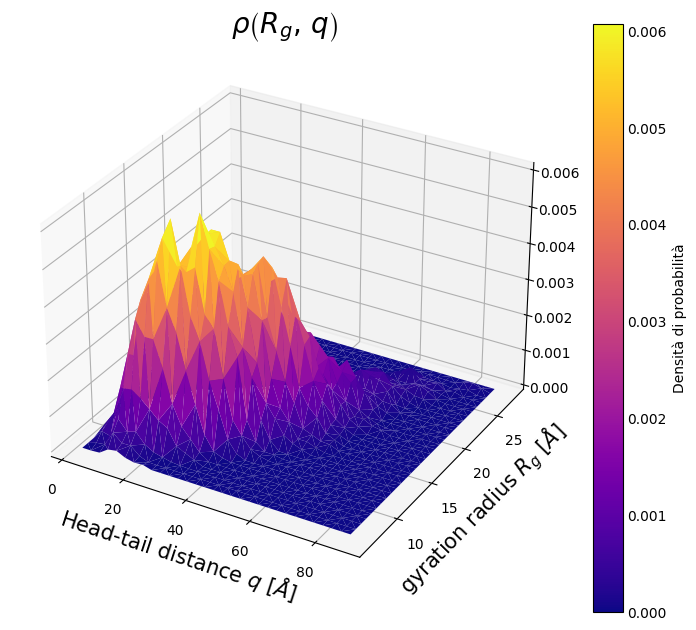

In [52]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

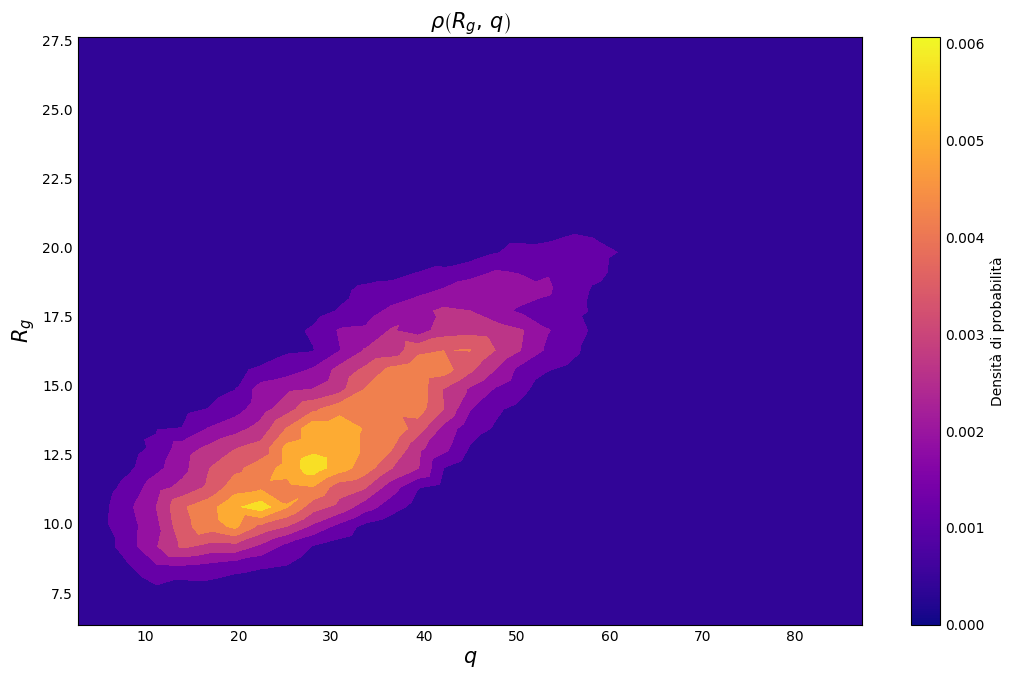

In [29]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"$\rho\left(R_g,\,q\right)$", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

Osserviamo come le configurazioni più visitate dal sistema si posizionano lungo una retta dotata di coefficiente angolare positivo; tali stati maggiormente visitati durante la simulazione costituiranno i minimi dell'energia libera, la quale si può ottenere come 

$$
F\left(\Upsilon\left(\vec{r}\right)\right)\,=\,-k_BT\log{\left(p\left(\Upsilon\right)\right)}\,-\,k_BT\log{\left(Z\right)}.
$$

La funzione di partizione compare nella relazione precedente come un offset irrilevante in energia e per questo motivo può essere scartato. Lavoriamo quindi ora applicando il logaritmo al risultato ottenuto in precedenza.

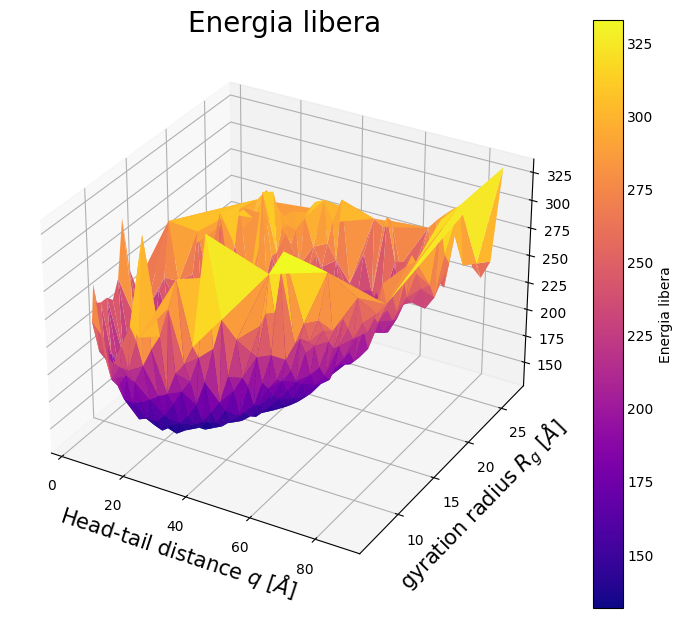

In [55]:
plt.style.use('_mpl-gallery')

data = np.loadtxt('2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kb*T*np.log(z[mask])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize = (7, 6))
ax.plot_trisurf(x, y, z, cmap='plasma')

ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Energia libera')
plt.show()

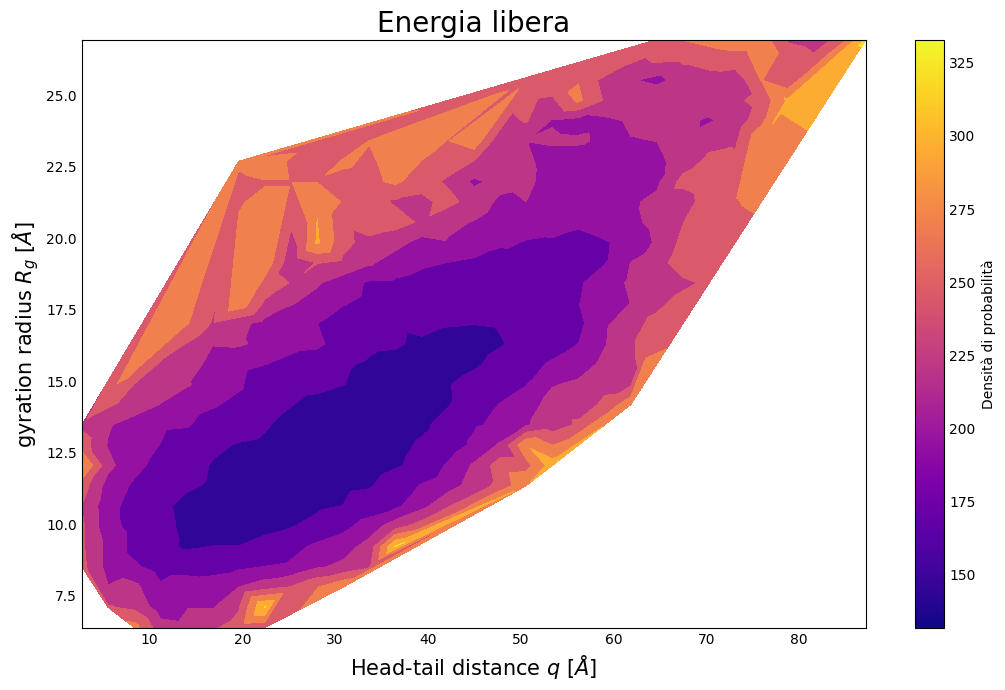

In [56]:
plt.style.use('_mpl-gallery-nogrid')

data = np.loadtxt('2Dbinning.dat') 
x, y, z = data[:, 0], data[:, 1], data[:, 2]

mask = z > 1e-8
x = x[mask]
y = y[mask]
z = -kb*T*np.log(z[mask])

fig, ax = plt.subplots(figsize = (10, 6))
ax.tricontourf(x, y, z, cmap = 'plasma')
ax.set_xlabel(r'Head-tail distance $q$ [$\AA$]', fontsize = 15)
ax.set_ylabel(r'gyration radius $R_g$ [$\AA$]', fontsize = 15)
ax.set_title(r"Energia libera", fontsize = 20)

sm = ScalarMappable(cmap='plasma')
sm.set_array(z)
plt.colorbar(sm, ax=ax, label='Densità di probabilità')
plt.show()

Osserviamo quanto anticipato, ossia che gli stati maggiormente visitati sono queli dotati di energia libera inferiore.